In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Data

## Loading

In [2]:
mnist_data = fetch_openml('mnist_784',version = 1)

## Exploration

In [3]:
print(mnist_data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
X, y = mnist_data['data'], mnist_data['target']
print('Shape of X:', X.shape, '\nShape of y:', y.shape)

Shape of X: (70000, 784) 
Shape of y: (70000,)


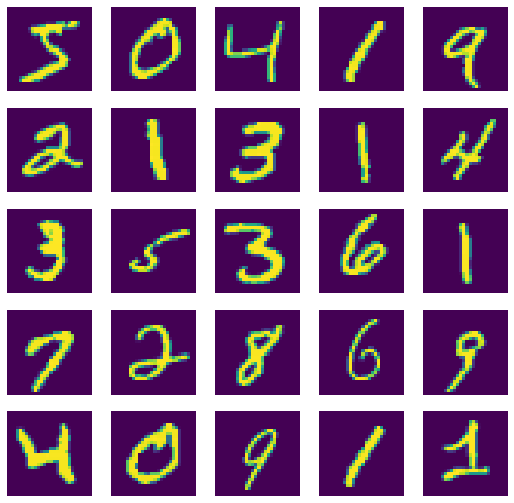

In [5]:
plt.figure(figsize=(9,9))
for i in np.arange(1,26):
    digit= X.iloc[i-1]
    digit_pixels = np.array(digit).reshape(28,28)
    plt.subplot(5,5,i)
    plt.imshow(digit_pixels)
    plt.axis('off')
plt.show()

In [6]:
type(y[0])

str

The data type is transformed into integer

In [7]:
y = y.astype(np.uint8)
type(y[0])

numpy.uint8

## Separation into training and test data

In [8]:
X_train, X_test = X[:60000],X[60000:]
Y_train, Y_test = y[:60000],y[60000:]
#print("Images d'apprentissage:\n",X_train,"\nImages de test:\n",X_test,
#    "\nLabels d'apprentissage:\n",Y_train,"\nLabels de Test:\n", Y_test)

# Model

## Stochastic Gradient Descent (SGD) to Train Linear Classifiers

'hinge' loss function for a linear SVM 

In [9]:
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train,Y_train)

SGDClassifier(random_state=42)

### Cross-validation (3)

In [10]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring ='accuracy')

array([0.87365, 0.85835, 0.8689 ])

### Score with test data

In [11]:
score = sgd_clf.score(X_test, Y_test)
print("Classifier accuracy on test data: ", score*100,"%")

Classifier accuracy on test data:  87.4 %


In [12]:
false_lst = []
for i in range(len(Y_test)):
    if sgd_clf.predict([X_test.iloc[i,:]])[0] != Y_test.iloc[i]:
        false_lst.append(i)

In [13]:
len(false_lst)

1260

We have 1260 badly predicted images and therefore 8740 correctly predicted images, we fall back on our accuracy.\
Let's look at which images have been mispredicted.

In [14]:
sample = rd.sample(false_lst, 24)
X_test_sample = X_test.iloc[sample,:]
Y_test_sample = Y_test.iloc[sample]
Y_pred_sample = []
for i in sample:
    Y_pred_sample.append(sgd_clf.predict([X_test.iloc[i,:]]))

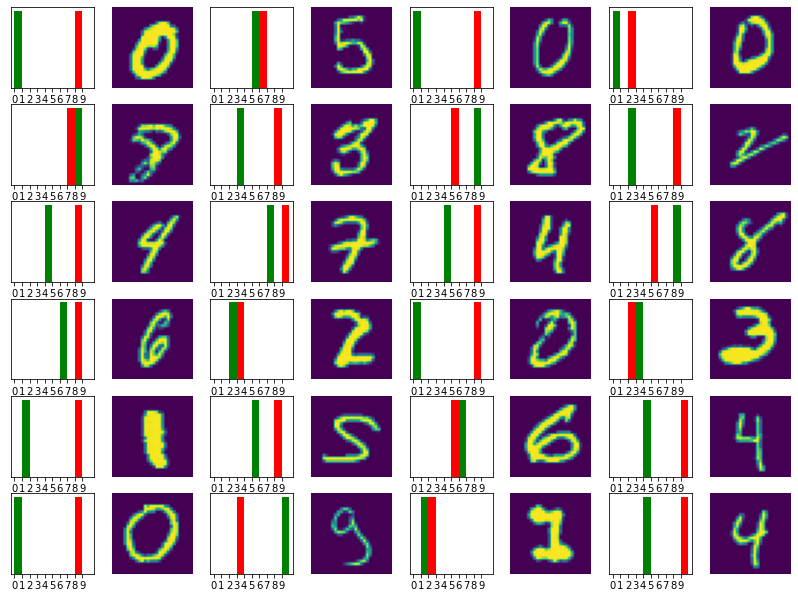

In [15]:
plt.figure(figsize=(14,14))
for i in np.arange(1,25):
    
    digit= X_test_sample.iloc[i-1]
    digit_pixels = np.array(digit).reshape(28,28)
    
    plt.subplot(8,8,2*i)
    plt.imshow(digit_pixels)
    plt.axis('off')
    
    plt.subplot(8,8,2*i-1)
    plt.hist([Y_pred_sample[i-1]],range(0,11),color="red",linewidth=10)#predicted
    plt.hist([Y_test_sample.iloc[i-1]],range(0,11),color="green",linewidth=10)#real
    plt.xticks(range(10))
    plt.yticks([])
    
plt.show()

## Logistic Regression

'log' loss function for a logistic SVM 

In [16]:
sgd_clf1 = SGDClassifier(loss='log', random_state=42)
sgd_clf1.fit(X_train,Y_train)

SGDClassifier(loss='log', random_state=42)

 ### Cross-validation

In [17]:
cross_val_score(sgd_clf1, X_train, Y_train, cv=3, scoring ='accuracy')

array([0.8691 , 0.87985, 0.87845])

### Score with test data

In [18]:
score = sgd_clf1.score(X_test, Y_test)
print("Accuracy with test data: ", score*100,"%")

Accuracy with test data:  87.72 %


In [19]:
fake_list1 = []
for i in range(len(Y_test)):
    if sgd_clf1.predict([X_test.iloc[i,:]])[0] != Y_test.iloc[i]:
        fake_list1.append(i)

In [21]:
if len(set(fake_list1).intersection(sample))==len(sample):
    print("still misclassified")
else :
    print("Some images that were initially poorly predicted are now correctly predicted")

Some images that were initially poorly predicted are now correctly predicted


In [22]:
Y_pred_sample1 = []
for i in sample:
    Y_pred_sample1.append(sgd_clf1.predict([X_test.iloc[i,:]]))

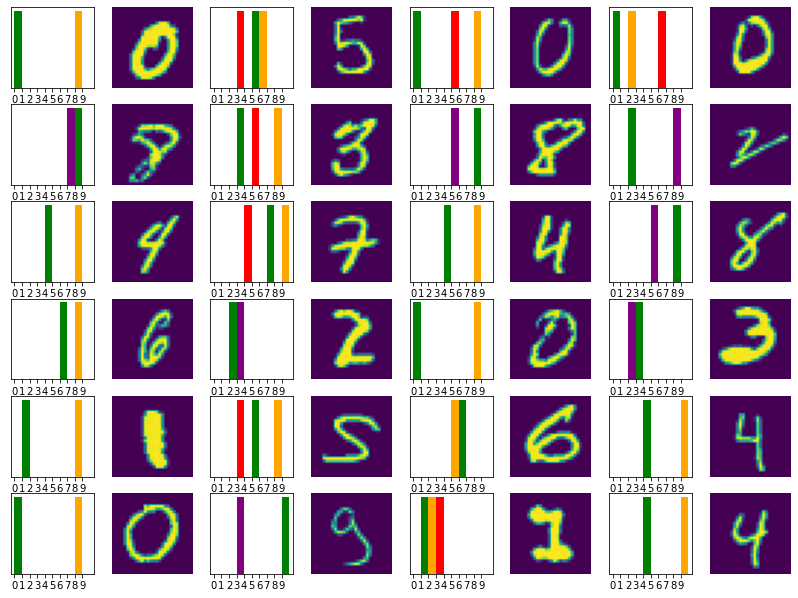

In [23]:
plt.figure(figsize=(14,14))
for i in np.arange(1,25):
    digit= X_test_sample.iloc[i-1]
    digit_pixels = np.array(digit).reshape(28,28)
    plt.subplot(8,8,2*i)
    plt.imshow(digit_pixels)
    plt.axis('off')
    plt.subplot(8,8,2*i-1)
    if Y_pred_sample1[i-1]==Y_pred_sample[i-1]:
        plt.hist([Y_pred_sample1[i-1]],range(0,11),color="purple",linewidth=10)
    else:
        plt.hist([Y_pred_sample1[i-1]],range(0,11),color="red",linewidth=10)#predicted
        plt.hist([Y_pred_sample[i-1]],range(0,11),color="orange",linewidth=10)#predicted
    plt.hist([Y_test_sample.iloc[i-1]],range(0,11),color="green",linewidth=10)#real
    plt.xticks(range(10))
    plt.yticks([])
plt.show()

If the histograms have three bars ($\textbf{Green}$,$\textbf{Orange}$,$\textbf{Red}$): The predictions are wrong but the prediction results are different.\
If the histograms have two bars ($\textbf{Green}$,$\textbf{Purple}$): The predictions are wrong and have not changed.\
If the histograms have two bars ($\textbf{Green}$,$\textbf{Orange}$): The new predictions are good.